In [1]:
import pandas as pd
inventory_og = pd.read_csv('T_F41SCHEDULE_B43.zip')

<ipython-input-1-ebb5fa245e1b>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory_og = pd.read_csv('T_F41SCHEDULE_B43.zip')


# Investigate the missing data in this dataset.

Specifically, for each of the following variables that have missing data, decide if any imputation is possible. Give your reasoning and code if you decide to impute missing values.
Columns for investigation: CARRIER, CARRIER_NAME, MANUFACTURE_YEAR, NUMBER_OF_SEATS, CAPACITY_IN_POUNDS, and AIRLINE_ID.
For example, watch out for "North American Airlines" aircrafts. Are the CARRIER/UNIQUE_CARRIER column really missing?

First, understand the dataset's size and columns and where the missing data is.

In [3]:
inventory = inventory_og.copy()
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

In [ ]:
inventory.isnull().sum()

,0
YEAR,0
CARRIER,49
CARRIER_NAME,105
MANUFACTURE_YEAR,3
UNIQUE_CARRIER_NAME,105
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,7


<Axes: >

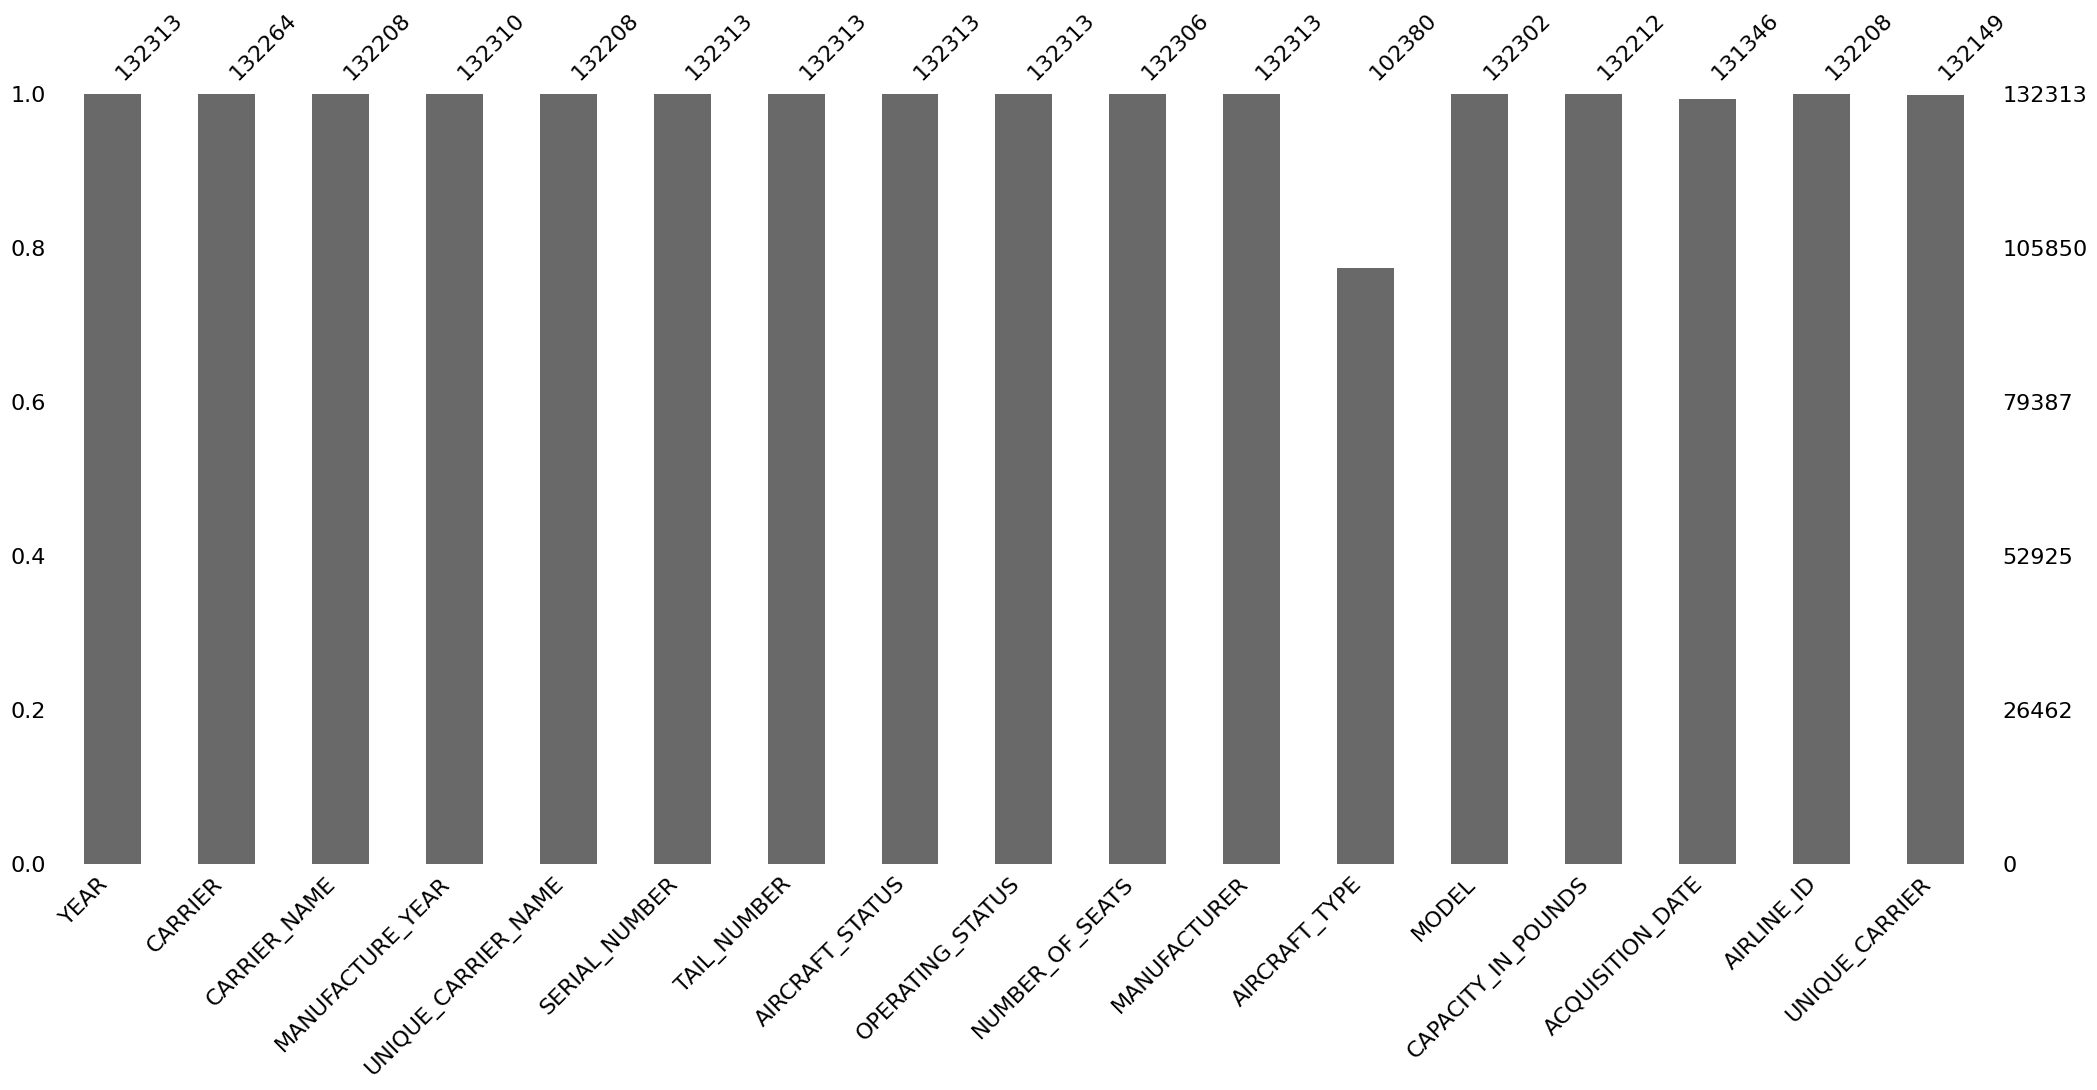

In [ ]:
import missingno as msno
msno.bar(inventory)

## Handling CARRIER and UNIQUE_CARRIER for North American Airlines

In [4]:
# Show the possible carrier names
inventory.CARRIER.unique()

array(['16', '3Z', '5X', '5Y', '8C', '9E', '9S', 'AA', 'ABX', 'AJQ',
       'AMQ', 'AQ', 'AS', 'AX', 'B6', 'CO', 'CS', 'CTQ', 'DL', 'E0', 'ER',
       'EV', 'F2', 'F9', 'FL', 'FX', 'G4', 'G7', 'GFQ', 'GG', 'HA', 'HP',
       'JW', 'KAQ', 'KLQ', 'L2', 'M6', 'MG', 'MQ', 'MRQ', 'NC', 'NK',
       'NW', 'OH', 'OO', 'OW', 'PCQ', 'PFQ', 'PO', 'PRQ', 'PT', 'QX',
       'RD', 'SI', 'SLQ', 'SY', 'TZ', 'U5', 'U7', 'UA', 'US', 'WI', 'WN',
       'WO', 'X9', 'XE', 'XJ', 'XP', 'YV', 'YX', 'ZQ', 'ZW', 'CP', 'E9',
       'EZ', 'FE', 'L4', nan, 'RW', 'S5', 'SX', 'VX', 'WE', '9L', 'FCQ',
       'GL', '0JQ', '0WQ', '16 ', '3Z ', '5X ', '5Y ', '8C ', '9E ',
       '9L ', '9S ', 'AA ', 'AQ ', 'AS ', 'B6 ', 'CO ', 'CP ', 'CS ',
       'DL ', 'ER ', 'EV ', 'EZ ', 'F9 ', 'FL ', 'FX ', 'G4 ', 'G7 ',
       'GL ', 'HA ', 'JW ', 'L2 ', 'L3 ', 'M6 ', 'MQ ', 'NA ', 'NC ',
       'NK ', 'NW ', 'OH ', 'OO ', 'OW ', 'PM ', 'PO ', 'PT ', 'QX ',
       'RD ', 'S5 ', 'SI ', 'SY ', 'U5 ', 'U7 ', 'UA ', 'US ', 'VX ',
   

In [5]:
# Show the possible unique carrier names
inventory.UNIQUE_CARRIER.unique()

array(['16', '3Z', '5X', '5Y', '8C', '9E', '9S', 'AA', 'ABX', 'AJQ',
       'AMQ', 'KH', 'AS', 'AX', 'B6', 'CO', 'CS', 'CTQ', 'DL', 'E0', 'ER',
       'EV', 'F2', 'F9', 'FL', 'FX', 'G4', 'G7', 'GFQ', 'GG', 'HA', 'HP',
       'JW', 'KAQ', 'KLQ', 'L2', 'M6', 'MG', 'MQ', 'MRQ', 'NC', 'NK',
       'NW', 'OH', 'OO', 'OW', 'PCQ', 'PFQ', 'PO', 'PRQ', 'PT', 'QX',
       'RD', 'SI', 'SLQ', 'SY', 'TZ', 'U5', 'U7', 'UA', 'US', 'WI', 'WN',
       'WO', 'X9', 'XE', 'XJ', 'XP', 'YV', 'YX (1)', 'ZQ', 'ZW', 'CP',
       'E9', 'EZ', 'FE', nan, 'YX', 'S5', 'SX', 'VX', 'WE', '9L', 'FCQ',
       'GL', 'L3', '0JQ', '0WQ', 'PM', '5V', 'N8', 'OH (1)', 'PT (1)',
       '09Q', '1BQ', '1EQ', 'K8', 'RP', '1TQ', 'WP', '20Q', 'KD', '23Q',
       '27Q', 'EE', '2HQ', '2PQ', 'WL', '34Q', '37Q', '3EQ', 'C5', '3FQ',
       '3M', 'GCA', 'MX'], dtype=object)

It is likely that "NA" (the North American Airlines carrier name) is being misinterpreted as NaN by Python.

In [6]:
# Show data points for North American Airlines
inventory[inventory['CARRIER_NAME'] == 'North American Airlines']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11776,2007,NaN,North American Airlines,1993.0,North American Airlines,26257,N760NA,B,Y,273.0,BOEING,NaN,B767-3,104476.0,3/23/2004 12:00:00 AM,20415.0,NaN
11777,2007,NaN,North American Airlines,1995.0,North American Airlines,26277,N750NA,B,Y,199.0,BOEING,NaN,B757-2,58491.0,1/27/1995 12:00:00 AM,20415.0,NaN
11778,2007,NaN,North American Airlines,1996.0,North American Airlines,28039,N769NA,B,Y,268.0,BOEING,NaN,B767-3,100500.0,2/19/2007 12:00:00 AM,20415.0,NaN
11779,2007,NaN,North American Airlines,1996.0,North American Airlines,28098,N765NA,B,Y,206.0,BOEING,NaN,B767-3,94523.0,3/23/2006 12:00:00 AM,20415.0,NaN
11780,2007,NaN,North American Airlines,1997.0,North American Airlines,28174,N752NA,B,Y,199.0,BOEING,NaN,B757-2,58948.0,5/12/1999 12:00:00 AM,20415.0,NaN
11781,2007,NaN,North American Airlines,2000.0,North American Airlines,30043,N755NA,B,Y,199.0,BOEING,NaN,B757-2,56526.0,2/25/2003 12:00:00 AM,20415.0,NaN
11782,2007,NaN,North American Airlines,2001.0,North American Airlines,29381,N754NA,B,Y,199.0,BOEING,NaN,B757-2,58550.0,4/2/2001 12:00:00 AM,20415.0,NaN
11783,2007,NaN,North American Airlines,2001.0,North American Airlines,32448,N756NA,B,Y,199.0,BOEING,NaN,B757-2,58159.0,6/3/2001 12:00:00 AM,20415.0,NaN
11784,2007,NaN,North American Airlines,2002.0,North American Airlines,27569,N767NA,B,Y,247.0,BOEING,NaN,B767-3,105420.0,8/14/2002 12:00:00 AM,20415.0,NaN
11785,2007,NaN,North American Airlines,2002.0,North American Airlines,29898,N768NA,B,Y,262.0,BOEING,NaN,B767-3,103057.0,9/6/2002 12:00:00 AM,20415.0,NaN


The string object "NA" has incorrectly translated to NaN in Python for several of the CARRIER and UNIQUE_CARRIER values under North American Airlines

In [7]:
# Replace all carrier and unique carrier names with string "NA"
inventory.loc[inventory['CARRIER_NAME'] == 'North American Airlines', ['CARRIER', 'UNIQUE_CARRIER']] = "NA".__str__()

# Now, display which columns have null values to ensure the replacement was successful
inventory.isnull().sum()

,0
YEAR,0
CARRIER,0
CARRIER_NAME,105
MANUFACTURE_YEAR,3
UNIQUE_CARRIER_NAME,105
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,7


Now, carrier and unique_carrier are being correctly interepreted as strings "NA", and the data that was thought to be missing has been imputed.

## CARRIER_NAME, AIRLINE ID, UNIQUE_CARRIER_NAMES and UNIQUE_CARRIER investigation

All of the above columns have 105 missing values which may indicate that there are 105 rows with these values missing...let's find out!

In [10]:
# Display any row that is missing its carrier name, airline id, unique carrier, or unique carrier name
missing_values = inventory[inventory[['CARRIER_NAME', 'AIRLINE_ID', 'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME']].isnull().any(axis=1)]
display(missing_values)


,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,NaN,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,NaN,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,NaN,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,NaN,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,NaN,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,NaN,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,NaN,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,NaN,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,NaN,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


There are exactly 105 rows which have CARRIER_NAME, AIRLINE_ID, UNIQUE_CARRIER, UNIQUE_CARRIER_NAME missing, which means these all of these values are missing in each of the 105 rows.

In [11]:
# Display the carrier types in these 105 rows with missing data
missing_values['CARRIER'].unique()

array(['L4', 'OH'], dtype=object)

There are only 2 carriers with missing values in several columns. To fill in the missing values, the corresponding values from rows with the full data included can be mapped. Let's investigate the values of the columns to fill for these 2 carriers to ensure that they are consistent across the missing values we are looking to fill.

In [12]:
# Data of rows with OH as its carrier
oh_rows = inventory[inventory['CARRIER'] == 'OH']

# Print possible values for the 4 columns to fill under OH carrier name
print("Unique UNIQUE_CARRIER_NAMEs for OH:", oh_rows['UNIQUE_CARRIER_NAME'].dropna().unique())
print("Unique CARRIER_NAMEs for OH:", oh_rows['CARRIER_NAME'].dropna().unique())
print("Unique AIRLINE_IDs for OH:", oh_rows['AIRLINE_ID'].dropna().unique())
print("Unique UNIQUE_CARRIERs for OH:", oh_rows['UNIQUE_CARRIER'].dropna().unique())

Unique UNIQUE_CARRIER_NAMEs for OH: ['Comair Inc.' 'PSA Airlines Inc.']
Unique CARRIER_NAMEs for OH: ['Comair Inc.' 'PSA Airlines Inc.']
Unique AIRLINE_IDs for OH: [20417. 20397.]
Unique UNIQUE_CARRIERs for OH: ['OH' 'OH (1)']


There are 2 possible mappings under OH for each column. Let's check how many models there are in the missing values.

In [13]:
# Check how many model types are in the OH missing values
oh_missing_vals = missing_values[missing_values['CARRIER'] == 'OH']
oh_missing_vals['MODEL'].unique()

array(['CRJ100-Passanger', 'CRJ200-Passanger', 'CRJ700-Passanger',
       'CRJ900-Passanger'], dtype=object)

Does model type uniquely identify which carrier name, airline id, and unique carrier should be used?

In [14]:
# Check to see if model type uniquely classifies the carrier name and airline id
oh_rows.groupby('MODEL')[['UNIQUE_CARRIER_NAME','CARRIER_NAME', 'AIRLINE_ID', 'UNIQUE_CARRIER']].nunique()

,UNIQUE_CARRIER_NAME,CARRIER_NAME,AIRLINE_ID,UNIQUE_CARRIER
MODEL,,,,
CL-600-2C10,1,1,1,1
CL-600-2D24,1,1,1,1
CRJ-2/4,1,1,1,1
CRJ-900,1,1,1,1
CRJ100-Passanger,1,1,1,1
CRJ200,1,1,1,1
CRJ200-Passanger,1,1,1,1
CRJ700,1,1,1,1
CRJ700-Passanger,1,1,1,1


Yes, only one possible combination of carrier name, airline id, unique carrier name, and unique carrier is inlcuded for each model type. Therefore, we can use the data from previous rows' model to fill in the missing data under the OH carrier.

In [ ]:
# Isolate rows with L4 carrier
l4_rows = inventory[inventory['CARRIER'] == 'L4']

# Check all possible values of the following values given L4 carrier
print("Unique UNIQUE_CARRIER_NAMEs for L4:", l4_rows['UNIQUE_CARRIER_NAME'].dropna().unique())
print("Unique CARRIER_NAMEs for L4:", l4_rows['CARRIER_NAME'].dropna().unique())
print("Unique AIRLINE_IDs for L4:", l4_rows['AIRLINE_ID'].dropna().unique())
print("Unique UNIQUE_CARRIERs for L4:", l4_rows['UNIQUE_CARRIER'].dropna().unique())

Unique UNIQUE_CARRIER_NAMEs for L4: ['Lynx Aviation d/b/a Frontier Airlines']
Unique CARRIER_NAMEs for L4: ['Lynx Aviation d/b/a Frontier Airlines']
Unique AIRLINE_IDs for L4: [21217.]
Unique UNIQUE_CARRIERs for L4: ['L3']


Because all entries for CARRIER_NAMES, AIRLINE_IDs, and UNQIQUE_CARRIERs are identical, the missing data can be filled in accordingly for L4 carrier.

In [15]:
# Imputation
from sklearn.impute import SimpleImputer
inventory_filled = inventory.copy()

# First handle OH missing values
oh_rows = inventory_filled['CARRIER'] == 'OH'
cols_to_fill = ['CARRIER_NAME', 'AIRLINE_ID', 'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME']

for col in cols_to_fill:
    inventory_filled.loc[oh_rows, col] = (
        inventory[oh_rows]
        # group by model as this determines the other column values
        .groupby('MODEL')[col]
        # fill forwards and backwards for all missing values for the model
        # all previous values in the column should be identical
        .transform(lambda x: x.ffill().bfill())
    )


# Next, handle LH missing values
l4_rows = inventory['CARRIER'] == 'L4'

# "Most frequent" strategy used as all values should be identical for the 4 columns to fill
imputer = SimpleImputer(strategy='most_frequent')

# Perform imputation
inventory_filled.loc[l4_rows, ['CARRIER_NAME', 'AIRLINE_ID', 'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME']] = imputer.fit_transform(
    inventory_filled.loc[l4_rows, ['CARRIER_NAME', 'AIRLINE_ID', 'UNIQUE_CARRIER', 'UNIQUE_CARRIER_NAME']]
)


In [16]:
# Check to ensure the imputation was doen correctly
inventory_filled.isnull().sum()

,0
YEAR,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,3
UNIQUE_CARRIER_NAME,0
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,7


In [17]:
# Double check that there is stil one unique combo of column value for each model
oh_filled = inventory_filled[inventory_filled['CARRIER'] == 'OH']
oh_filled.groupby('MODEL')[['UNIQUE_CARRIER_NAME','CARRIER_NAME', 'AIRLINE_ID', 'UNIQUE_CARRIER']].nunique()

,UNIQUE_CARRIER_NAME,CARRIER_NAME,AIRLINE_ID,UNIQUE_CARRIER
MODEL,,,,
CL-600-2C10,1,1,1,1
CL-600-2D24,1,1,1,1
CRJ-2/4,1,1,1,1
CRJ-900,1,1,1,1
CRJ100-Passanger,1,1,1,1
CRJ200,1,1,1,1
CRJ200-Passanger,1,1,1,1
CRJ700,1,1,1,1
CRJ700-Passanger,1,1,1,1


## Handling NUMBER_OF_SEATS

In [ ]:
# Display the data of rows with missing seats
missing_num_seats = inventory_filled[inventory_filled['NUMBER_OF_SEATS'].isnull()]
display(missing_num_seats)

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
97550,2019,M6,Amerijet International,1982.0,Amerijet International,22218,N743AX,b,Y,NaN,BOEING,6252,767-232SFCARGO,96000.0,7/1/2010 12:00:00 AM,20151.0,M6
97551,2019,M6,Amerijet International,1988.0,Amerijet International,24146,N316CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,8/19/2014 12:00:00 AM,20151.0,M6
97552,2019,M6,Amerijet International,1988.0,Amerijet International,24407,N319CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,9/29/2014 12:00:00 AM,20151.0,M6
97553,2019,M6,Amerijet International,1990.0,Amerijet International,24929,N373CM,b,Y,NaN,BOEING,6262,767-338ERCARGO,118000.0,7/15/2016 12:00:00 AM,20151.0,M6
97554,2019,M6,Amerijet International,1991.0,Amerijet International,25195,N396CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,11/29/2017 12:00:00 AM,20151.0,M6
97555,2019,M6,Amerijet International,1993.0,Amerijet International,26995,N347CM,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,10/12/2018 12:00:00 AM,20151.0,M6
97556,2019,M6,Amerijet International,1994.0,Amerijet International,27184,N378CX,b,Y,NaN,BOEING,6262,767-323ERCARGO,118000.0,6/8/2018 12:00:00 AM,20151.0,M6


All of the missing number of seats values come from the M6 carrier

In [18]:
# Determine the number of seats on all M6 fligts
inventory_filled[inventory_filled['CARRIER'] == 'M6']['NUMBER_OF_SEATS'].unique()

array([ 0., nan])

Because all M6 flights have 0 seats, simple imputation can be done to fill in the missing values

In [29]:
# Constant strategy can be used because all missing values will be filled with 0
constant_imputer = SimpleImputer(strategy='constant')
inventory_constant = inventory_filled.copy()

# set constant, completing data
constant_imputer.fill_value = 0
inventory_constant['NUMBER_OF_SEATS'] = constant_imputer.fit_transform(inventory_constant[['NUMBER_OF_SEATS']])

In [30]:
# Check to see that the imputation ran correctly (no NUM_SEATS are null)
inventory_constant.isnull().sum()

,0
YEAR,0
CARRIER,0
CARRIER_NAME,0
MANUFACTURE_YEAR,3
UNIQUE_CARRIER_NAME,0
SERIAL_NUMBER,0
TAIL_NUMBER,0
AIRCRAFT_STATUS,0
OPERATING_STATUS,0
NUMBER_OF_SEATS,0


## Handling MANUFACTURE_YEAR

In [ ]:
# Display rows with missing manufacture years
inventory_constant[inventory_constant['MANUFACTURE_YEAR'].isnull()]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
116651,2022,5Y,Atlas Air Inc.,NaN,Atlas Air Inc.,26259,N664GT,B,Y,0.0,BOEING,8192,B747-400,Original,1/25/2022 12:00:00 AM,20007.0,5Y
124680,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10134,N655CA,O,Y,69.0,BOMBARDIER,6311,CL-600-2C10,Original,NaN,20363.0,9E
124681,2023,9E,Endeavor Air Inc.,NaN,Endeavor Air Inc.,10182,N690CA,O,N,69.0,BOMBARDIER,6311,CL-600-2C10,Original,NaN,20363.0,9E


In [ ]:
# Correlation between manufacture year and other columns
inventory_constant.select_dtypes('number').corr()

,YEAR,MANUFACTURE_YEAR,NUMBER_OF_SEATS,AIRLINE_ID
YEAR,1.000000,0.102218,0.090705,0.013590
MANUFACTURE_YEAR,0.102218,1.000000,0.073283,0.016764
NUMBER_OF_SEATS,0.090705,0.073283,1.000000,-0.373594
AIRLINE_ID,0.013590,0.016764,-0.373594,1.000000


Because there are only 3 manufacturing years missing and there is little correlation between the manufacturing year and the other columns' values, simply removing these three rows rather than "guessing" with imputation should not impact the analysis in a negative way. This is especially true because 3 rows out of the original 132313 is only 0.002% of the data.

## Handling CAPACITY_IN_POUNDS

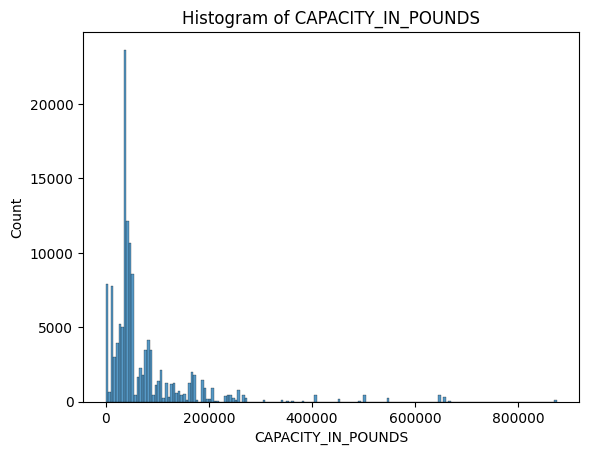

In [ ]:
# Display a histogram of the distribution of capacities
import seaborn as sns
sns.histplot(inventory_constant['CAPACITY_IN_POUNDS'], binwidth=5000)
plt.title('Histogram of CAPACITY_IN_POUNDS')
plt.show()

The data is heavily skewed, so using metrics such as mean would not output accurate results. One method that could work is nearest neighbors. This method will compare rows that are similar (similar aircraft models, number of seats, etc.) to estimate the missing capacity.

In [23]:
# Models that are the same likely have similar capacities
# Display all models names that have capacities missing
missing_capacity = inventory_constant[inventory_constant['CAPACITY_IN_POUNDS'].isna()]
missing_capacity['MODEL'].unique()

array(['B767-200', 'B767-300', 'DC-10-10', 'DC-10-30', 'MD-11',
       'A-320-PSGRneo'], dtype=object)

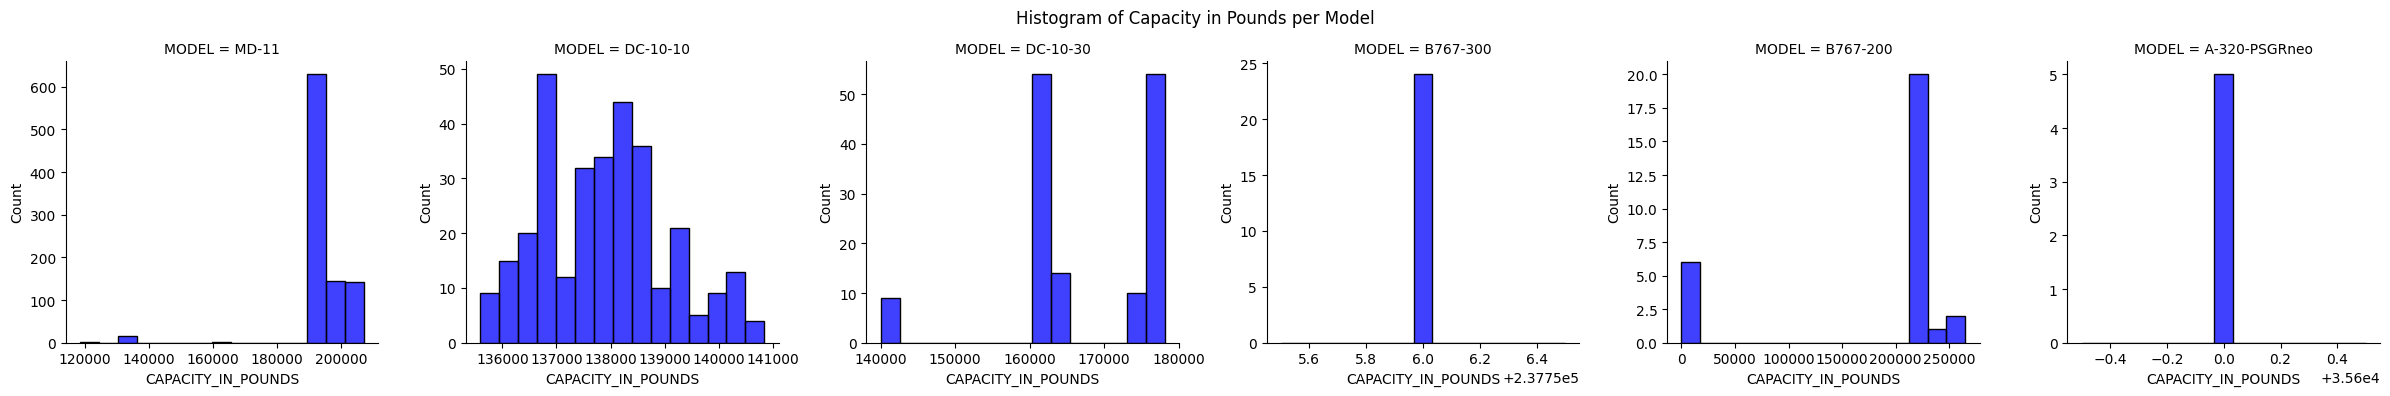

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ['B767-200', 'B767-300', 'DC-10-10', 'DC-10-30', 'MD-11', 'A-320-PSGRneo']

# Isolate data for each of the missing models
subset = inventory_constant[inventory_constant['MODEL'].isin(models)]

# Plot a histogram of the frequency of different capacities by model
g = sns.FacetGrid(subset, col="MODEL", height=4, sharex=False, sharey=False)
g.map(sns.histplot, "CAPACITY_IN_POUNDS", bins=15, color="blue")

g.fig.suptitle("Histogram of Capacity in Pounds per Model")
plt.subplots_adjust(top=0.85)
plt.show()



The model is a good indicator of capacity as can be seen in the histograms. Each model has a unique range of values of its capacity. Additionally, mnodels B767-300 and A-320-PSGRneo have constant capacities so these can be filled with simple imputation before KNN is performed.

In [ ]:
# Simple imputation to fill constant values
inventory_constant.loc[inventory_constant['MODEL'] == 'B767-300', 'CAPACITY_IN_POUNDS'] = 6
inventory_constant.loc[inventory_constant['MODEL'] == 'A-320-PSGRneo', 'CAPACITY_IN_POUNDS'] = 0


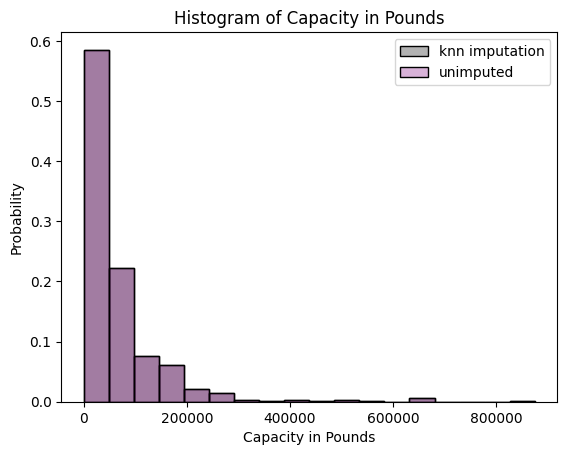

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
inventory_knn = inventory_constant.copy()

from sklearn.impute import KNNImputer

inventory_knn = inventory_constant.copy()

models = ['B767-200', 'DC-10-10', 'DC-10-30', 'MD-11']

# set up imputing for KNN
knn_imputer = KNNImputer(n_neighbors = 3)

inventory_knn_impute = knn_imputer.fit_transform(inventory_knn.select_dtypes('number'))
inventory_knn_df = pd.DataFrame(inventory_knn_impute, columns=inventory_knn.select_dtypes('number').columns)

inventory_knn['CAPACITY_IN_POUNDS'] = inventory_knn_df['CAPACITY_IN_POUNDS']

fig, ax = plt.subplots(1, 1)
sns.histplot(inventory_knn_df['CAPACITY_IN_POUNDS'], binwidth=50000, stat='probability', alpha=0.3, color='k', label='knn imputation')
sns.histplot(inventory_constant['CAPACITY_IN_POUNDS'], binwidth=50000, stat='probability', alpha=0.3, color='purple', label='unimputed')
ax.set_title('Histogram of Capacity in Pounds')
ax.set_xlabel('Capacity in Pounds')
ax.set_ylabel('Probability')
ax.legend()


Difficult to see how accurate the imputation was in looking at the whole dataset, so break it down by model type to visualizehow well the imputation did.

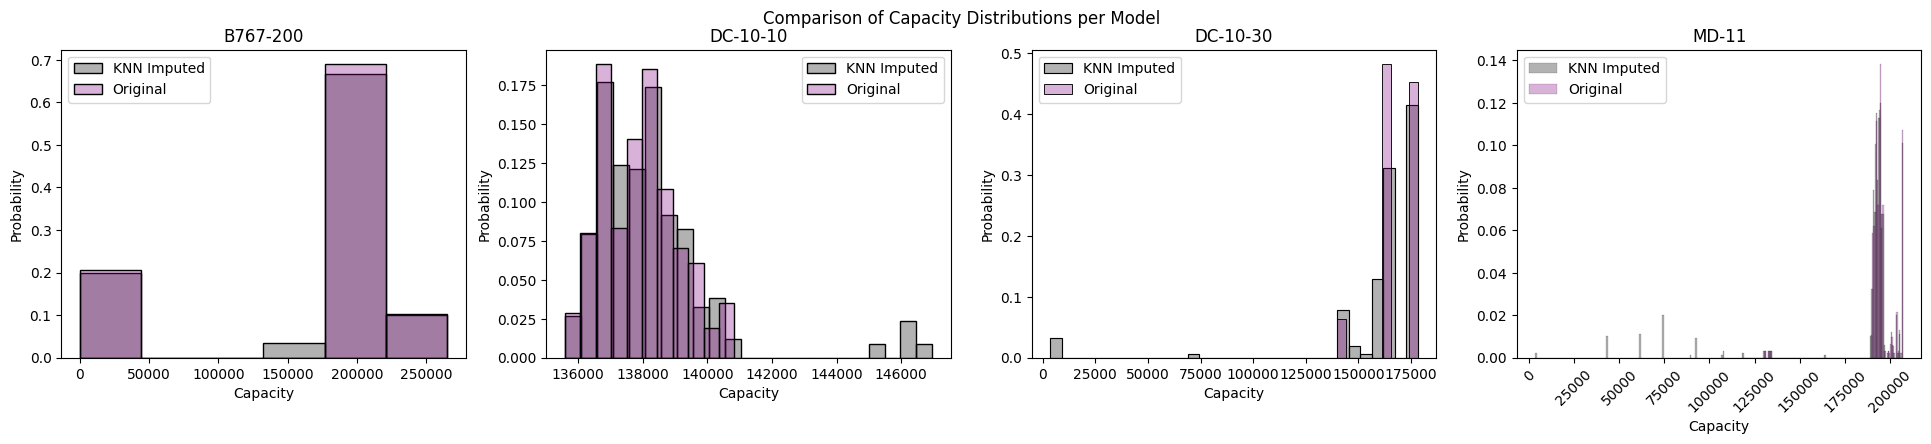

In [33]:
# Plot imputed/original values after KNN
fig, axes = plt.subplots(1, 4, figsize=(24, 4))

for ax, model in zip(axes, models):
    subset_original = inventory_constant[inventory_constant['MODEL'] == model]
    subset_imputed = inventory_knn[inventory_knn['MODEL'] == model]

    sns.histplot(subset_imputed['CAPACITY_IN_POUNDS'], stat='probability',
                 alpha=0.3, color='black', label='KNN Imputed', ax=ax)

    sns.histplot(subset_original['CAPACITY_IN_POUNDS'], stat='probability',
                 alpha=0.3, color='purple', label='Original', ax=ax)

    ax.set_title(f'{model}')
    ax.set_xlabel('Capacity')
    ax.legend()
    plt.xticks(rotation=45)

axes[0].set_ylabel('Probability')

fig.suptitle('Comparison of Capacity Distributions per Model')
plt.show()


KNN performed relatively well. The capacities that it imputed are all, for the most part, within a reasonable range of possible capacities for the given models.

In [38]:
# Replace imputed values back into dataset
inventory_constant['CAPACITY_IN_POUNDS'] = inventory_knn['CAPACITY_IN_POUNDS']

# Check to make sure the imputation was performed and there are no null capacities
inventory_constant['CAPACITY_IN_POUNDS'].isnull().sum()

np.int64(0)

# Inspect the columns MANUFACTURER, MODEL, AIRCRAFT_STATUS, and OPERATING_STATUS. Decide, for each column, if transformation or standardization of data are required. Give your reasoning and code if you decide to transform the data.

Hints:
For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
Use value_counts() to identify "big wins".
Break down into multiple steps, instead of having one line of code to do them all.

## Operating Status

In [ ]:
# Determine what value counts for operating status
inventory_constant['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126577
N,5664
y,71
,1


There are 4 possible values include: Y, N, y, and ' '.

On the BTS [dataset attribute summary](https://www.transtats.bts.gov/Oneway.asp?Svryq_Qr5p=Nv4p4ns6%FDf6n675&Svryq_gB2r=Pun4&fry_Pn6=NVePeNSg_fgNghf&Y11x72_gnoyr=Y_NVePeNSg_fgNghf&fry_in4=ahZORe_bS_fRNgf&fry_f6n6=f7z&Qn6n_gB2r=PNg&cr4pr06_Synt=D&Qv52ynB_Synt=D) website, operating status under the "Analysis" tab is shown to mean Y= yes, N=no, and y=unknown. However, I have chosen to merge y and Y because since it is indicated with a y, it may be more likely for the status to be Y. I understand that this is an assumption, and in real-world situations, I would want to confirm that this course of action makes sense.


To investigate if the ' ' value could be accurately assigned to "Y" or "N", I looked at the rows surround the row with the missing data to see if there are any evident patterns.

In [ ]:
# Row with missing inventory status
inventory_constant[inventory_constant['OPERATING_STATUS'] == ' ']

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
118601,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145700,N24128,b,,50.0,Embraer,6751,EMB-145XR,12755.0,9/1/2020 12:00:00 AM,20445.0,C5


In [ ]:
# Rows surrounding missing inventory status
inventory_constant.loc[118595:118605]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
118595,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145684,N12122,b,N,50.0,Embraer,6751,EMB-145XR,12755.0,11/4/2020 12:00:00 AM,20445.0,C5
118596,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145688,N13123,b,N,50.0,Embraer,6751,EMB-145XR,12755.0,11/4/2020 12:00:00 AM,20445.0,C5
118597,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145689,N13124,b,Y,50.0,Embraer,6751,EMB-145XR,12755.0,9/22/2020 12:00:00 AM,20445.0,C5
118598,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145690,N14125,b,Y,50.0,Embraer,6751,EMB-145XR,12755.0,9/8/2020 12:00:00 AM,20445.0,C5
118599,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145693,N12126,b,N,50.0,Embraer,6751,EMB-145XR,12755.0,9/29/2020 12:00:00 AM,20445.0,C5
118600,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145697,N11127,b,N,50.0,Embraer,6751,EMB-145XR,12755.0,10/8/2020 12:00:00 AM,20445.0,C5
118601,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145700,N24128,b,,50.0,Embraer,6751,EMB-145XR,12755.0,9/1/2020 12:00:00 AM,20445.0,C5
118602,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145703,N21129,b,N,50.0,Embraer,6751,EMB-145XR,12755.0,9/23/2020 12:00:00 AM,20445.0,C5
118603,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145704,N21130,b,N,50.0,Embraer,6751,EMB-145XR,12755.0,11/4/2020 12:00:00 AM,20445.0,C5
118604,2022,C5,CommuteAir LLC dba CommuteAir,2003.0,CommuteAir LLC dba CommuteAir,145705,N31131,b,N,50.0,Embraer,6751,EMB-145XR,12755.0,9/21/2020 12:00:00 AM,20445.0,C5


Because there are no clear patterns, we cannot make any certain predictions of whether the blank should be (Y or N). For now, I will remove this row as it should not impact the analysis in a signifcant way and will help to clean the dataset.

In [39]:
# Drop row with inconsistent operating status
inventory_constant = inventory_constant.drop(118601)

In [40]:
# Set y to Y
inventory_constant['OPERATING_STATUS'] = inventory_constant['OPERATING_STATUS'].replace('y', 'Y')
inventory_constant['OPERATING_STATUS'].value_counts()

,count
OPERATING_STATUS,
Y,126648
N,5664


This has cleaned the data in Operating Status because it combines values (Y and y) that likely have the same meaning.

## Aircraft Status

In [41]:
# Display value counts
inventory_constant['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79487
b,30851
B,12699
a,7804
A,1330
L,122
o,19


On the [BTS dataset attribute summary website](https://www.transtats.bts.gov/Oneway.asp?Svryq_Qr5p=Nv4p4ns6%FDf6n675&Svryq_gB2r=Pun4&fry_Pn6=NVePeNSg_fgNghf&Y11x72_gnoyr=Y_NVePeNSg_fgNghf&fry_in4=ahZORe_bS_fRNgf&fry_f6n6=f7z&Qn6n_gB2r=PNg&cr4pr06_Synt=D&Qv52ynB_Synt=D), the values in aircraft status are O, a, and b. I will standardize the data such that o is set to O, A is set to a, and B is set to b. In this way, I am assuming that O & o, A & a, and B & b have the same meaning. This action will ensure that the data matches the description on the website.

In [42]:
# Standardize values
inventory_constant['AIRCRAFT_STATUS'] = inventory_constant['AIRCRAFT_STATUS'].replace('o', 'O')
inventory_constant['AIRCRAFT_STATUS'] = inventory_constant['AIRCRAFT_STATUS'].replace('B', 'b')
inventory_constant['AIRCRAFT_STATUS'] = inventory_constant['AIRCRAFT_STATUS'].replace('A', 'a')
inventory_constant['AIRCRAFT_STATUS'].value_counts()

,count
AIRCRAFT_STATUS,
O,79506
b,43550
a,9134
L,122


## Manufacturer

In [ ]:
# Display current value counts of manufacturers
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
BOEING,15922
Embraer,11508
THEBOEINGCO,9223
Bombardier,8871
Boeing,8392
...,...
BEECHHAWKER400XP,1
Dassault-Falcon-2000EXEASy,1
ISRAELAIRCRAFTINDUSTRIES,1


It is immediately obvious that that the same companies are being listed multiple times under variations of the same company name (ex: BOEING and Boeing). These must be standardized so that companies are accurately represented and considered as one entity rather than separately under the variations of names.

In [43]:
# Tranform data into all lowercase letters to start standardizing case variations
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].str.lower()
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,24348
embraer,14794
airbus,12477
bombardier,11692
theboeingco,9231
...,...
fokker72,1
mcdonnel,1
dassault-falcon-2000exeasy,1


Next, I will go company by company looking for variations that occur in the data and standardize to only one name

In [44]:
# Consolidate all rows containing 'boeing'
boeing_df = inventory_constant[inventory_constant['MANUFACTURER'].str.contains('boeing', case=False, na=False)]
boeing_df['MANUFACTURER'].unique()

array(['boeing',
       'boeing                                                                          ',
       'theboeingcompany', 'boeingco', 'boeingcompany', 'theboeingco',
       'boeing747-446', 'boeingco.', 'boeing(mcdonnell-douglas)'],
      dtype=object)

In [45]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('theboeingcompany', 'boeing')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('boeingco', 'boeing')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('boeingcompany', 'boeing')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('theboeingco', 'boeing')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('boeing747-446', 'boeing')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('boeingco.', 'boeing')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('boeing(mcdonnell-douglas)', 'boeing')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('b757-223', 'boeing')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
embraer,14794
airbus,12477
bombardier,11692
airbusindustries,7053
...,...
cssnacitationx,1
dassault-falcon-2000exeasy,1
saabscania,1


In [46]:
# Consolidate all rows containing 'McD'
mcd_df = inventory_constant[inventory_constant['MANUFACTURER'].str.contains('mcd|doug', case=False, na=False)]
mcd_df['MANUFACTURER'].unique()

array(['mcdonnell-douglas',
       'mcdonnell-douglas                                                               ',
       'douglas', 'mcdonnelldouglas', 'mcdonnelldoug', 'douglasaircraft',
       'mcdonneldouglas', 'mcdonalddouglas', 'mddouglas',
       'mcdonnelldouglasmd11-f', 'mcdonnel', 'mcdonnell', 'mcdo'],
      dtype=object)

In [47]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('douglas', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdonnelldouglas', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdonnelldoug', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('douglasaircraft', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdonneldouglas', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdonalddouglas', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mddouglas', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdonnelldouglasmd11-f', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdonnel', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdonnell', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('mcdo', 'mcdonnell-douglas')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
embraer,14794
airbus,12477
bombardier,11692
mcdonnell-douglas,9871
...,...
ama/expr,1
dassault-falcon-2000exeasy,1
saabscania,1


In [48]:
# Consolidate all rows containing 'Fok'
fok_df = inventory_constant[inventory_constant['MANUFACTURER'].str.contains('fok', case=False, na=False)]
fok_df['MANUFACTURER'].unique()

array(['fokker',
       'fokker                                                                          ',
       'fokkeraircraftusa', 'fokker72', 'fokker70', 'fokker71'],
      dtype=object)

In [49]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('fokkeraircraftusa', 'fokker')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('fokker72', 'fokker')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('fokker70', 'fokker')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('fokker71', 'fokker')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
embraer,14794
airbus,12477
bombardier,11692
mcdonnell-douglas,9871
...,...
ama/expr,1
dassault-falcon-2000exeasy,1
saabscania,1


In [50]:
# Consolidate all rows containing 'airb'
air_df = inventory_constant[inventory_constant['MANUFACTURER'].str.contains('airb', case=False, na=False)]
air_df['MANUFACTURER'].unique()

array(['airbus',
       'airbus                                                                          ',
       'airbusindustries', 'airbusindustrie', 'airbuscompany',
       'airblue/airbus'], dtype=object)

In [51]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('airbusindustries', 'airbus')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('airbusindustrie', 'airbus')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('airbuscompany', 'airbus')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('airblue/airbus', 'airbus')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
airbus,22554
embraer,14794
bombardier,11692
mcdonnell-douglas,9871
...,...
beechhawker400xp,1
dassault-falcon-2000exeasy,1
saabscania,1


In [52]:
# Consolidate all rows containing 'saab'
saab_df = inventory_constant[inventory_constant['MANUFACTURER'].str.contains('saab', case=False, na=False)]
saab_df['MANUFACTURER'].unique()

array(['saab aircraft',
       'saab aircraft                                                                   ',
       'saab', 'saabfairchild', 'saabscania', 'saab-fairchild'],
      dtype=object)

In [53]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('saab aircraft', 'saab')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('saab-fairchild', 'saabfairchild')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('saabscania', 'saab')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
airbus,22554
embraer,14794
bombardier,11692
mcdonnell-douglas,9871
...,...
ama/expr,1
beechcraft,1
dassault-falcon-2000exeasy,1


In [54]:
# Consolidate all rows containing 'bomb'
bomb_df = inventory_constant[inventory_constant['MANUFACTURER'].str.contains('bomb', case=False, na=False)]
bomb_df['MANUFACTURER'].unique()

array(['bombardier',
       'bombardier                                                                      ',
       'bombardieraerospace'], dtype=object)

In [55]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('bombardieraerospace', 'bombardier')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
airbus,22554
embraer,14794
bombardier,12341
mcdonnell-douglas,9871
...,...
ama/expr,1
beechcraft,1
dassault-falcon-2000exeasy,1


In [56]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('challenger300', 'challenger')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
airbus,22554
embraer,14794
bombardier,12341
mcdonnell-douglas,9871
...,...
beechcraft,1
dassault-falcon-2000exeasy,1
rolls-royce,1


In [57]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('dassult sud', 'dassault')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
airbus,22554
embraer,14794
bombardier,12341
mcdonnell-douglas,9871
...,...
beechcraft,1
dassault-falcon-2000exeasy,1
rolls-royce,1


In [58]:
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('gulfstreamaerospace', 'gulfstream')
inventory_constant['MANUFACTURER'] = inventory_constant['MANUFACTURER'].replace('gulfstreamaerospacecorp', 'gulfstream')
inventory_constant['MANUFACTURER'].value_counts()

,count
MANUFACTURER,
boeing,52829
airbus,22554
embraer,14794
bombardier,12341
mcdonnell-douglas,9871
...,...
beechcraft,1
dassault-falcon-2000exeasy,1
rolls-royce,1


Now, many of the replicated company names appear under only 1 version of the name. This standardization reduced the number of unique manufactures in the dataset by 62 (183-121).

## Model

In [ ]:
# Display the value counts of models in the data
inventory_constant['MODEL'].value_counts()

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
A321-231(P2F),1
777FFX,1
T210N,1


It is clear that there are models that are the same but have been entered into the data under different names. This could confuse anaylsis by considering these models to be separate from each other. Therefore, the model names must be standardized if they are representing the same model. First, I will capatilize all letters to eliminate case differiations between model names.

In [59]:
# Capitalize all letters
inventory_constant['MODEL'] = inventory_constant['MODEL'].str.upper()
inventory_constant['MODEL'].value_counts()

,count
MODEL,
EMB-145,2614
B-737-7H4,2470
B737-823,2370
A320-232,2333
A321-231,2259
...,...
B-737-290C,1
717-23S,1
A321-232(PCF),1


Next, I manually looked through model names containing similar characters and mapped names appearing to represent the same model to a uniform name. The following code was used to help me search the data and create the mappings.

In [60]:

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737-300.*P', case=False, na=False)]
_737_df['MODEL'].unique()


_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737-400.*P', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737-500.*P', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737-700.*P', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737-800.*P', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737-900.*P', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737-800', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737.*7H4', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'737.*823', case=False, na=False)]
_737_df['MODEL'].unique()

_737_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'boeing*737', case=False, na=False)]
_737_df['MODEL'].unique()

_717_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'717', case=False, na=False)]
_717_df['MODEL'].unique()

_767_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'767-400', case=False, na=False)]
_767_df['MODEL'].unique()

_747_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'747-400', case=False, na=False)]
_747_df['MODEL'].unique()

_777_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'777', case=False, na=False)]
_777_df['MODEL'].unique()

_727_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'727', case=False, na=False)]
_727_df['MODEL'].unique()

A_df = inventory_constant[inventory_constant['MODEL'].str.contains(r'A.*320', case=False, na=False)]
A_df['MODEL'].unique()

array(['A320-1/2', 'A320-1/2            ', 'A320-232', 'A320-PSGR',
       'A320PAX', 'A320-214', 'AIRBUSA320-232PAX', 'A320-231', 'A320',
       'A320-211-PSGR', 'A-320-PSGR', 'A320-232-PSGR', 'A-320-114',
       'A-320-112', 'A-320-214', 'AIRBUSA320-232', 'A320-212-PSGR',
       'A-320-1/2', 'A-320-2NEO', 'A-320-PSGRNEO', 'A-320-214PSGR',
       'A320-211', 'A320-212', 'ATR42-320', 'A320-271N'], dtype=object)

In [61]:
model_map = {
    'B737-300PAX': 'B737-300-PSGR',
    '737-300PASSENGERONLY': 'B737-300-PSGR',
    'B-737-300-PSGR': 'B737-300-PSGR',
    'B737-400PSGR': 'B737-400-PSGR',
    'B-737-400-PSGR': 'B737-400-PSGR',
    'B-737-400PSGR': 'B737-400-PSGR',
    '737-400-PSGR': 'B737-400-PSGR',
    'B737-500PAX': 'B737-500-PSGR',
    '737-500PASSENGERONLY': 'B737-500-PSGR',
    'B737-700PAX': 'B737-700-PSGR',
    '737-700PASSENGERONLY': 'B737-700-PSGR',
    'B-737-700-PSGR': 'B737-700-PSGR',
    '737-700-PSGR': 'B737-700-PSGR',
    'B737-800PAX': 'B737-800-PSGR',
    '737-800PASSENGERONLY': 'B737-800-PSGR',
    'B-737-800-PSGR': 'B737-800-PSGR',
    '737-800-PSGR': 'B737-800-PSGR',
    'B-737-800PSGR': 'B737-800-PSGR',
    'B737-900ERPAX': 'B737-900ER-PSGR',
    '737-900ER-PSGR': 'B737-900ER-PSGR',
    'B737-900PAX': 'B737-900-PSGR',
    '737-200C': 'B737-200-C',
    '737-200CARGO': 'B737-200-C',
    '737-200': 'B737-200',
    '737-300': 'B737-300',
    'B-737-300': 'B737-300',
    'B-737-300CRG': 'B737-300-C',
    '737-400': 'B737-400',
    'B-737-400': 'B737-400',
    'B-737-500': 'B737-500',
    '737-500': 'B737-500',
    '737-700': 'B737-700',
    'B-737-700': 'B737-700',
    '737-800': 'B737-800',
    'B-737-800': 'B737-800',
    'BOEING737-700/LR': 'B737-700/LR',
    'BOEING737-45D' : 'B737-45D',
    'BOEING737-4K5': 'B737-4K5',
    'BOEING737-883' : 'B737-883',
    'B-717-2             ': 'B717-2',
    '717-200PASSENGERONLY': 'B717-200-PSGR',
    'BOEING717-200': 'B717-200',
    '717-200-PSG': 'B717-200-PSGR',
    'B-717-200': 'B717-200',
    'B7170200': 'B717-200',
    '717-200': 'B717-200',
    '717231': 'B717-231',
    '717-23S': 'B717-23S',
    'BOEING717-23S': 'B717-23S',
    'BOEING717-2BD': 'B717-2BD',
    '767-300-PSGR': 'B767-300-PSGR',
    'B767-300PSGR': 'B767-300-PSGR',
    'B-767-300PAX': 'B767-300-PSGR',
    'B-767-300ERPAX': 'B767-300-ERPSGR',
    '767-300ER-PSGR': 'B767-300-ERPSGR',
    'B767-200PAX': 'B767-200-PSGR',
    'B-767-200': 'B767-200',
    '767-200': 'B767-200',
    'B767-400            ': 'B767-400',
    'B767-400PAX': 'B767-400-PSGR',
    '767-400ER-PSGR': 'B767-400-ERPSGR',
    '767-400ER': 'B767-400-ERPSGR',
    'B-737-7H4': 'B737-7H4',
    '737-7H4': 'B737-7H4',
    'B-737-7H4-PSGR': 'B737-7H4-PSGR',
    '737-823': 'B737-823',
    '737-402': 'B737-402',
    '757-260PF': 'B757-260-PF',
    '757-2S7': 'B757-2S7',
    '737-4H6': 'B737-4H6',
    '747-200': 'B747-200',
    '747-400-PSGR': 'B747-400-PSGR',
    '747-400': 'B747-400',
    'B747-400CARGO': 'B747-400C',
    'B-747-400': 'B747-400',
    'B-747-400CRG': 'B747-400C',
    'B-777-2             ' : 'B777-2',
    'B777-200PASSENGER': 'B777-200-PSGR',
    'B777-200PAX': 'B777-200-PSGR',
    'B-777-200': 'B777-200',
    '777-200-PSGR':'B777-200-PSGR',
    '777-200': 'B777-200',
    'B777-300PASSENGER' : 'B777-300-PSGR',
    '727-200': 'B727-200',
    'B-727-200' : 'B727-200',
    '727-223' : 'B727-223',
    'B-727-223' : 'B727-223',
    'A320PAX': 'A320-PSGR',
    'A-320-PSGR': 'A320-PSGR',
    'A321-231PASSENGER' :'A321-231-PSGR'


}

In [62]:
# Map the new standardized values
inventory_constant['MODEL_STANDARDIZED'] = inventory_constant['MODEL'].map(model_map)
inventory_constant['MODEL_STANDARDIZED'] = inventory_constant['MODEL_STANDARDIZED'].fillna(inventory_constant['MODEL'])
inventory_constant['MODEL_STANDARDIZED'].value_counts()

,count
MODEL_STANDARDIZED,
B737-7H4,3039
B737-823,2647
EMB-145,2614
B737-700-PSGR,2566
A320-232,2333
...,...
EMBRAERERJ-145,1
757-29J,1
T210N,1


The number of models included in the data has been reduced by 75 (1340-1265)after standardizing model names.

# Remove data rows that still have missing values. Report the amount of remaining data you obtained.

In [63]:
inventory_clean = inventory_constant.dropna()
print(f"Remaining rows after dropping missing data: {len(inventory_clean)}")

Remaining rows after dropping missing data: 101400


# Transformation and derivative variables
For the columns NUMBER_OF_SEATS and CAPACITY_IN_POUNDS, check the skewness in the variable and plot a histogram for each variable.
The Box-Cox transformation (scipy.stats.boxcox) is one possible way to transform variables into a "more-normal-like" variable. Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. XXXXXXXXX_BOXCOX.
Plot a histogram for each transformed variable.
Describe what you observe before and after transformation.

In [64]:
from scipy.stats import boxcox

inventory_complete_fill = inventory_constant.copy()

# Quantified skewness
skew_number_of_seats = inventory_complete_fill['NUMBER_OF_SEATS'].skew()
skew_capacity_in_pounds = inventory_complete_fill['CAPACITY_IN_POUNDS'].skew()

print(f"Skewness of NUMBER_OF_SEATS: {skew_number_of_seats}")
print(f"Skewness of CAPACITY_IN_POUNDS: {skew_capacity_in_pounds}")



Skewness of NUMBER_OF_SEATS: 0.4304289385606638
Skewness of CAPACITY_IN_POUNDS: 4.064344356319628


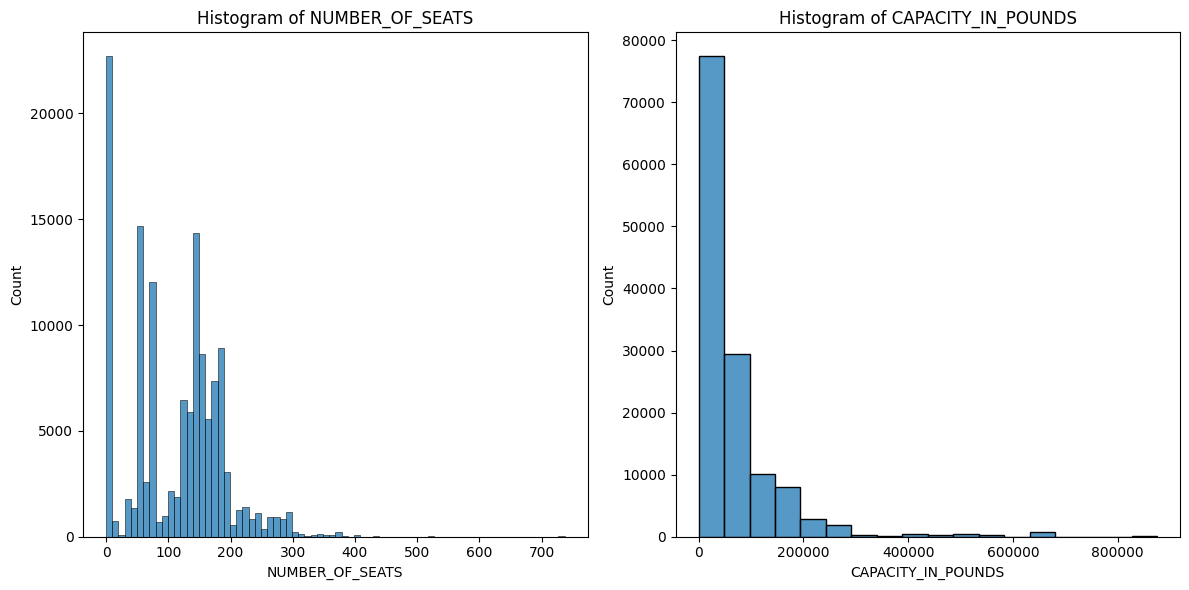

In [65]:
# Plot histograms prior to boxcox
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(inventory_complete_fill['NUMBER_OF_SEATS'], binwidth=10)
plt.title('Histogram of NUMBER_OF_SEATS')

plt.subplot(1, 2, 2)
sns.histplot(inventory_complete_fill['CAPACITY_IN_POUNDS'], binwidth=50000)
plt.title('Histogram of CAPACITY_IN_POUNDS')

plt.tight_layout()
plt.show()


Both datasets are right skewed. The quantified value of the skewness of the number of seats is lower than that of capacity in pounds. The same trend is seen in the histograms where capacity in pounds visually has a much stronger right skew than number of seats.

In [66]:
# Box-Cox transformation
# Box-Cox requires all data to be positive; many planes have 0 seats/capacity , so add 1
inventory_complete_fill['NUMBER_OF_SEATS_BOXCOX'], _ = boxcox(inventory_complete_fill['NUMBER_OF_SEATS']+1)

inventory_complete_fill['CAPACITY_IN_POUNDS_BOXCOX'], _ = boxcox(inventory_complete_fill['CAPACITY_IN_POUNDS']+1)


In [67]:
print(f"Skewness of transformed NUMBER_OF_SEATS: {inventory_complete_fill['NUMBER_OF_SEATS_BOXCOX'].skew()}")
print(f"Skewness of transformed CAPACITY_IN_POUNDS: {inventory_complete_fill['CAPACITY_IN_POUNDS_BOXCOX'].skew()}")

Skewness of transformed NUMBER_OF_SEATS: -0.5086628969917407
Skewness of transformed CAPACITY_IN_POUNDS: 0.2317779270971254


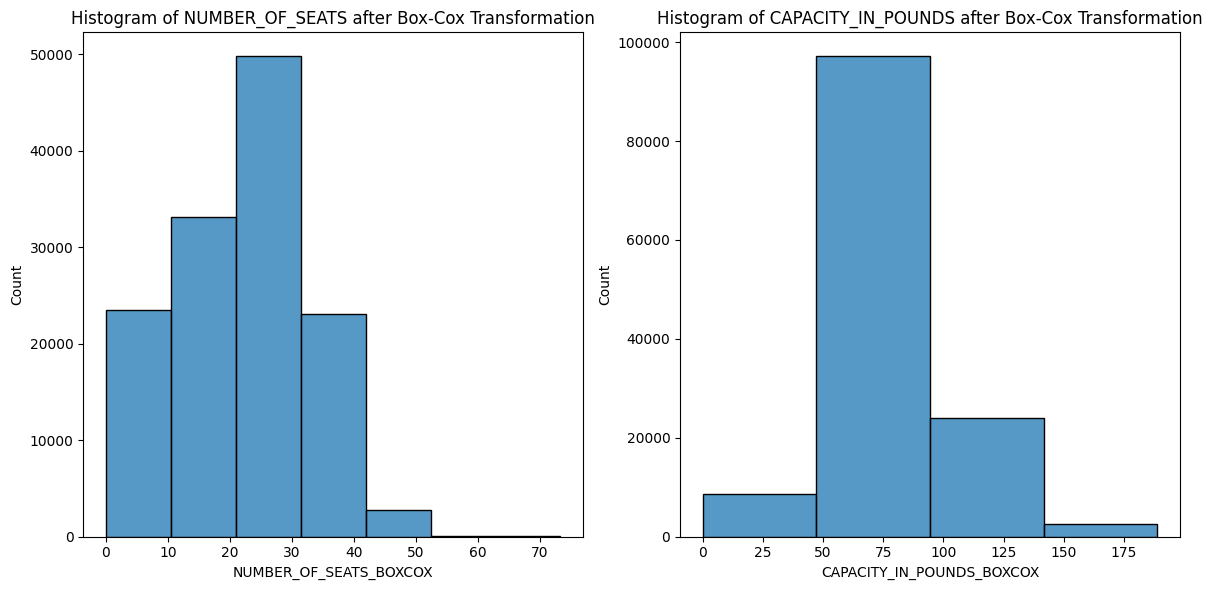

In [68]:
# Plot histograms post boxcox
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(inventory_complete_fill['NUMBER_OF_SEATS_BOXCOX'], binwidth=10)
plt.title('Histogram of NUMBER_OF_SEATS after Box-Cox Transformation')

plt.subplot(1, 2, 2)
sns.histplot(inventory_complete_fill['CAPACITY_IN_POUNDS_BOXCOX'], binwidth=50)
plt.title('Histogram of CAPACITY_IN_POUNDS after Box-Cox Transformation')

plt.tight_layout()
plt.show()


Post Box-Cox transformation, the quantified skewness is more left skewed for number of seats and still right skewed but much less severe than prior to the transformation. The histograms of the transformed data shows the same trends. However, the transformed data has a significantly smaller range of x-values in both columns of data.

# Feature engineering
Create a new column SIZE by the quartiles of NUMBER_OF_SEATS

*   below 25% percentile: SMALL
*   25% - 50% percentile: MEDIUM
*   50% - 75% percentile: LARGE
*   above 75% percentile: XLARGE


For each size group, provide and plot the proportions of aircrafts that are operating versus not (OPERATING_STATUS).
For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (AIRCRAFT_STATUS).
Provide a written summary of your findings.

In [69]:
# Define the quantiles
q1 = inventory_knn['NUMBER_OF_SEATS'].quantile(0.25)
q2 = inventory_knn['NUMBER_OF_SEATS'].quantile(0.50)
q3 = inventory_knn['NUMBER_OF_SEATS'].quantile(0.75)

# Function to assign size
def size(num_seats):
    if num_seats < q1:
        return 'SMALL'
    elif num_seats < q2:
        return 'MEDIUM'
    elif num_seats < q3:
        return 'LARGE'
    else:
        return 'XLARGE'

# Idenify the size group for all rows
inventory_clean['SIZE'] = inventory_knn['NUMBER_OF_SEATS'].apply(size)


<ipython-input-69-6cb91c9eb0bf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inventory_clean['SIZE'] = inventory_knn['NUMBER_OF_SEATS'].apply(size)


OPERATING_STATUS         N         Y
SIZE                                
LARGE             0.038723  0.961277
MEDIUM            0.053840  0.946160
SMALL             0.030837  0.969163
XLARGE            0.027043  0.972957


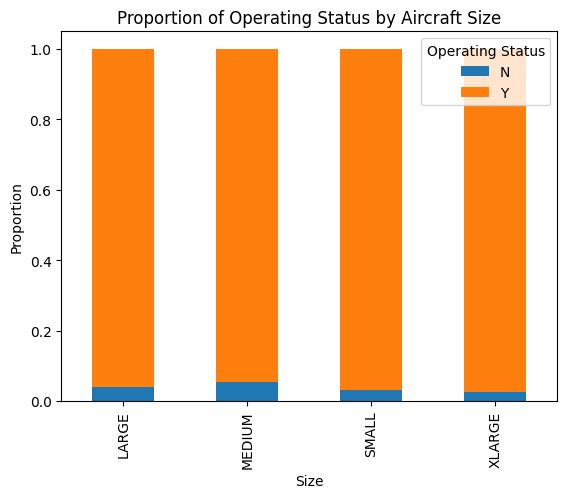

In [70]:
# Calculate proportion of size groups across operating status'
proportion = pd.crosstab(inventory_clean['SIZE'], inventory_clean['OPERATING_STATUS'], normalize="index")
print(proportion)

# Plot the proportions
proportion.plot(kind='bar', stacked=True)
plt.title("Proportion of Operating Status by Aircraft Size")
plt.ylabel("Proportion")
plt.xlabel("Size")
plt.legend(title="Operating Status")
plt.show()


Across all sizes, the proportion of planes operating remains relatively static (around 94 to 97%). This indicates that the majority of planes of all size types are operating. XLARGE planes are the most likely to be operating (97.3%) and MEDIUM planes are the least likely to be operating (94.6%).

AIRCRAFT_STATUS         L         O         a         b
SIZE                                                   
LARGE            0.001930  0.672894  0.123010  0.202166
MEDIUM           0.001176  0.415332  0.069020  0.514471
SMALL            0.000000  0.726694  0.037706  0.235599
XLARGE           0.001465  0.713382  0.071605  0.213548


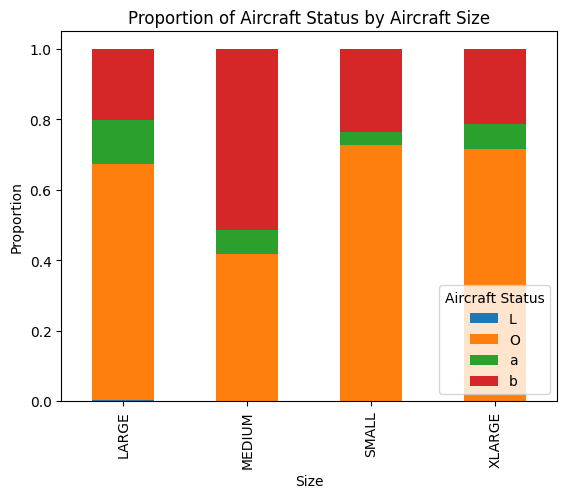

In [72]:
# Calculate proportion of size groups across operating status'
proportion = pd.crosstab(inventory_clean['SIZE'], inventory_clean['AIRCRAFT_STATUS'], normalize="index")
print(proportion)

# Plot the proportions
proportion.plot(kind='bar', stacked=True)
plt.title("Proportion of Aircraft Status by Aircraft Size")
plt.ylabel("Proportion")
plt.xlabel("Size")
plt.legend(title="Aircraft Status", loc='lower right')
plt.show()

The aircrafts that are small, large, and xlarge have majority "O" status, which means that they are owned, according to the online summary of the data. Small airplanes have the highest proportion of "O" status at 72.7%. A very low proportion, less than 0.2%, of aircrafts across all plane sizes have "L" status. Medium planes have majority "b" status (51.4%). After "L", "a" is the second least common status among all plane sizes (at most 12.3% for large aircrafts).